In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('forest-fire_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.7+ KB


In [5]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,8,2012,35,55,14,0.0,88.9,7.9,8.0,1.1,3.0,0.4,fire,1.0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [7]:
df=df.drop(['day','month','year'],axis=1)

In [8]:
df['Classes'].value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [9]:
df['Classes']= np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [11]:
x= df.drop('FWI',axis=1)

In [12]:
y= df['FWI']

In [13]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    int32  
 11  region       244 non-null    float64
dtypes: float64(8), int32(1), int64(3)
memory usage: 22.0 KB


In [16]:
df['region']=df['region'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    int32  
 11  region       244 non-null    int32  
dtypes: float64(7), int32(2), int64(3)
memory usage: 21.1 KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
x_train.shape,x_test.shape

((183, 11), (61, 11))

In [21]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.659628,-0.252923,-0.345434,0.703052,0.486268,0.377970,0.601507,0.458933,0.515929,0.255090
RH,-0.659628,1.000000,0.231965,0.240243,-0.641167,-0.395866,-0.216381,-0.694358,-0.342068,-0.445405,-0.400904
Ws,-0.252923,0.231965,1.000000,0.224273,-0.163737,-0.000060,0.085258,0.023042,0.036982,-0.078807,-0.238182
Rain,-0.345434,0.240243,0.224273,1.000000,-0.565334,-0.288548,-0.297756,-0.351753,-0.298655,-0.381726,-0.080694
FFMC,0.703052,-0.641167,-0.163737,-0.565334,1.000000,0.593218,0.498275,0.738497,0.581048,0.778849,0.251323
DMC,0.486268,-0.395866,-0.000060,-0.288548,0.593218,1.000000,0.877528,0.655066,0.981549,0.565895,0.200505
DC,0.377970,-0.216381,0.085258,-0.297756,0.498275,0.877528,1.000000,0.500711,0.941648,0.480110,-0.076616
ISI,0.601507,-0.694358,0.023042,-0.351753,0.738497,0.655066,0.500711,1.000000,0.628011,0.731403,0.273549
BUI,0.458933,-0.342068,0.036982,-0.298655,0.581048,0.981549,0.941648,0.628011,1.000000,0.564312,0.093806
Classes,0.515929,-0.445405,-0.078807,-0.381726,0.778849,0.565895,0.480110,0.731403,0.564312,1.000000,0.192316


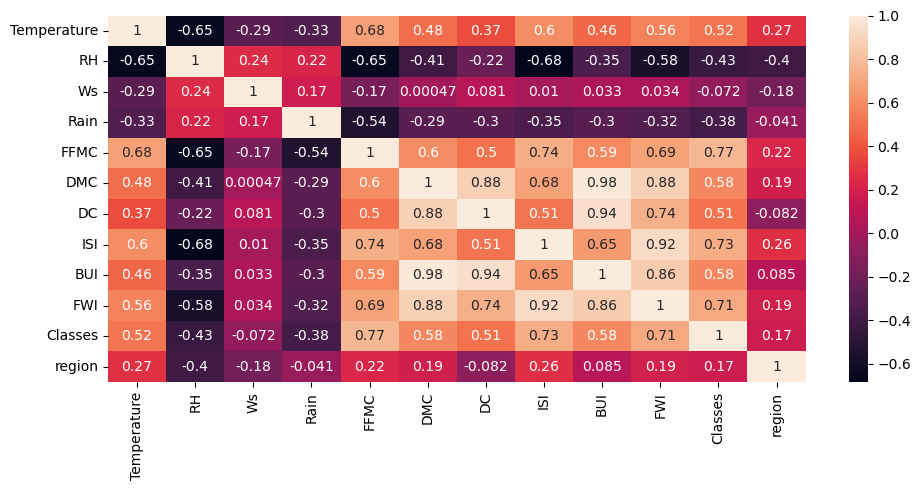

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [23]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651806,-0.285698,-0.327210,0.677371,0.483010,0.372425,0.599331,0.455237,0.562157,0.517375,0.271886
RH,-0.651806,1.000000,0.244831,0.222930,-0.645292,-0.407010,-0.224789,-0.683556,-0.351129,-0.578000,-0.432989,-0.403619
Ws,-0.285698,0.244831,1.000000,0.172188,-0.167931,0.000475,0.080863,0.010426,0.033459,0.034242,-0.071728,-0.182867
Rain,-0.327210,0.222930,0.172188,1.000000,-0.544287,-0.287652,-0.296112,-0.345460,-0.297688,-0.322400,-0.379758,-0.041485
FFMC,0.677371,-0.645292,-0.167931,-0.544287,1.000000,0.600769,0.503243,0.735165,0.587124,0.686342,0.770114,0.224680
DMC,0.483010,-0.407010,0.000475,-0.287652,0.600769,1.000000,0.875981,0.680932,0.981940,0.875900,0.582399,0.189325
DC,0.372425,-0.224789,0.080863,-0.296112,0.503243,0.875981,1.000000,0.510179,0.942171,0.740348,0.506393,-0.082021
ISI,0.599331,-0.683556,0.010426,-0.345460,0.735165,0.680932,0.510179,1.000000,0.645314,0.923142,0.729719,0.258638
BUI,0.455237,-0.351129,0.033459,-0.297688,0.587124,0.981940,0.942171,0.645314,1.000000,0.858464,0.581135,0.085103
FWI,0.562157,-0.578000,0.034242,-0.322400,0.686342,0.875900,0.740348,0.923142,0.858464,1.000000,0.713695,0.192711


In [24]:
def correlation(dataset,threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name= corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
        

In [25]:
corr_features=correlation(x_train,0.85)

In [26]:
corr_features

{'BUI', 'DC'}

In [27]:
x_train.drop(['BUI','DC'],axis=1,inplace=True)

In [28]:
x_test.drop(['BUI','DC'],axis=1,inplace=True)

In [29]:
# standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

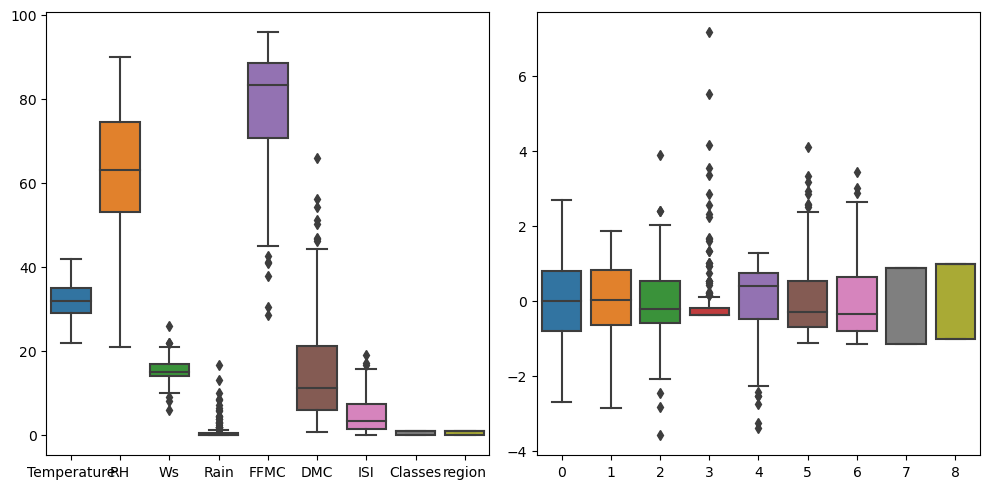

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.tight_layout()

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [37]:
y_pred= regressor.predict(x_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mse=mean_squared_error(y_test,y_pred)

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
mae=mean_absolute_error(y_test,y_pred)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r_score=r2_score(y_test,y_pred)

In [44]:
print(mse)
print(mae)
print(r_score)

0.5544879405674779
0.558205822054873
0.9904803311038952


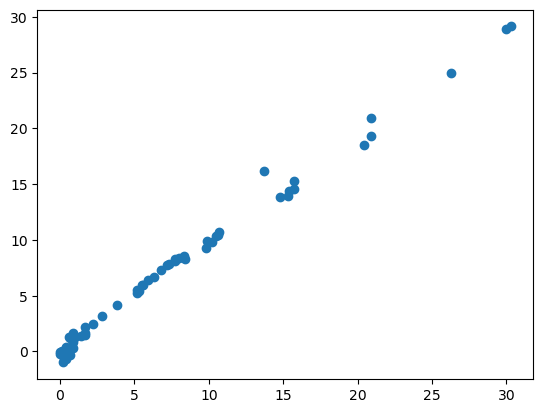

In [45]:
plt.scatter(y_test,y_pred)

In [46]:
residuals= y_test-y_pred

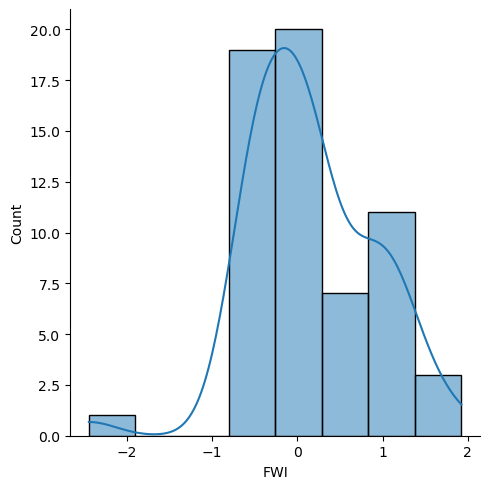

In [47]:
sns.displot(residuals,kde=True)

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso=Lasso()

In [50]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [51]:
y_pred=lasso.predict(x_test_scaled)

In [52]:
mae= mean_absolute_error(y_test,y_pred)

In [53]:
mse=mean_squared_error(y_test,y_pred)

In [54]:
r2= r2_score(y_test,y_pred)

In [55]:
print(mae)
print(mse)
print(r2)

1.1965937711788466
2.76307243165417
0.9525624765465899


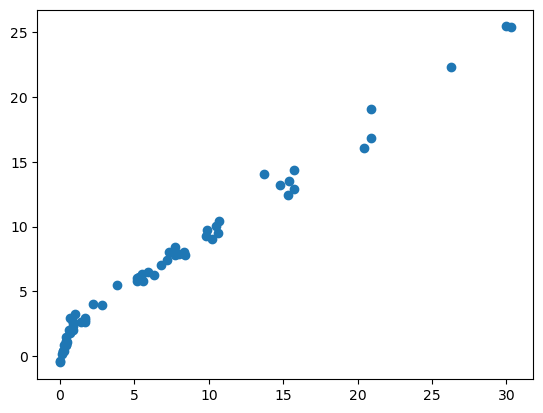

In [56]:
plt.scatter(y_test,y_pred)

In [57]:
from sklearn.linear_model import LassoCV

In [58]:
lasscv=LassoCV(cv=5)

In [59]:
lasscv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [60]:
y_pred=lasscv.predict(x_test_scaled)

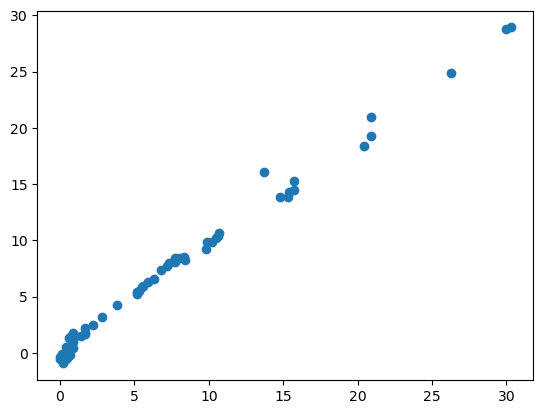

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [63]:
print(mae)
print(score)

0.591036463079728
0.9897659782374049


In [64]:
from sklearn.linear_model import Ridge

In [65]:
rdg=Ridge()

In [66]:
rdg.fit(x_train_scaled,y_train)

Ridge()

In [67]:
y_pred=rdg.predict(x_test_scaled)

In [68]:
mae=mean_absolute_error(y_test,y_pred)

In [69]:
score2=r2_score(y_test,y_pred)

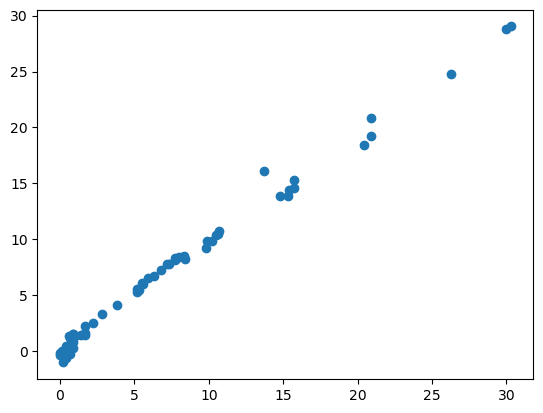

In [70]:
plt.scatter(y_test,y_pred)

In [71]:
print(mae)
print(score2)

0.5805070072721408
0.989945288805196


In [72]:
from sklearn.linear_model import RidgeCV

In [73]:
ridgeCV=RidgeCV(cv=5)

In [74]:
ridgeCV.fit(x_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [76]:
y_pred=ridgeCV.predict(x_test_scaled)

In [77]:
mae=mean_absolute_error(y_test,y_pred)

In [78]:
r2=r2_score(y_test,y_pred)

In [80]:
print(mae)
print(r2)

0.5805070072721408
0.989945288805196


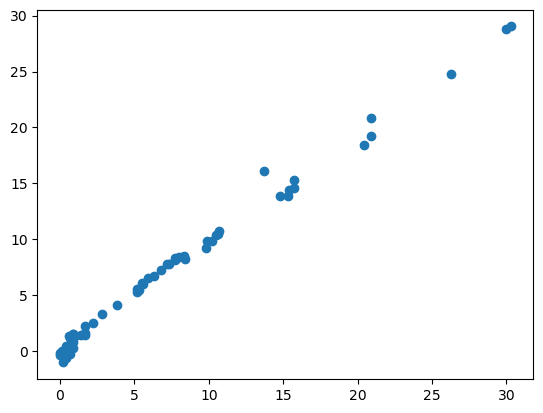

In [81]:
plt.scatter(y_test,y_pred)

In [82]:
from sklearn.linear_model import ElasticNet

In [84]:
en=ElasticNet()

In [85]:
en.fit(x_train_scaled,y_train)

ElasticNet()

In [86]:
y_pred=en.predict(x_test_scaled)

In [87]:
mae=mean_absolute_error(y_test,y_pred)

In [90]:
r2=r2_score(y_test,y_pred)

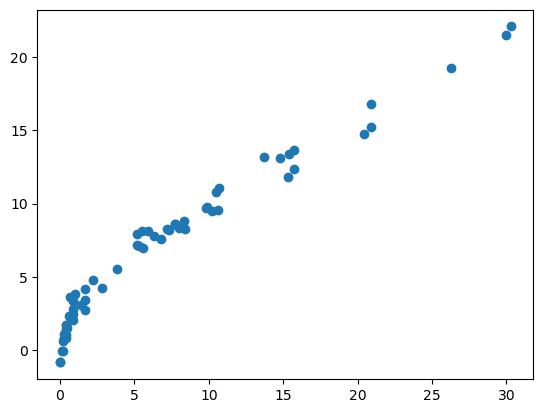

In [91]:
plt.scatter(y_test,y_pred)

In [92]:
from sklearn.linear_model import ElasticNetCV

In [93]:
enCV=ElasticNetCV()

In [95]:
enCV.fit(x_train_scaled,y_train)

ElasticNetCV()

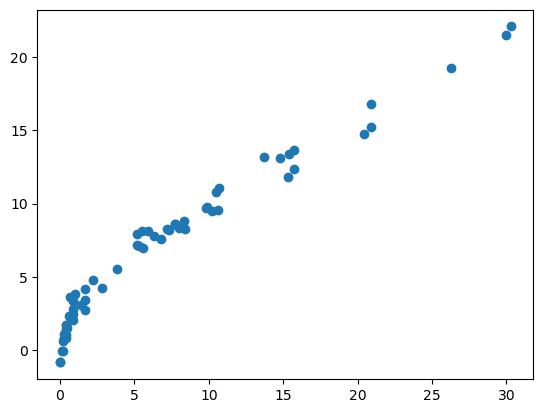

In [96]:
plt.scatter(y_test,y_pred)

In [97]:
mae=mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [98]:
print(mae)
print(r2)

1.8625271758723454
0.8832125817205358


In [99]:
scaler

StandardScaler()

In [101]:
rdg

Ridge()

In [102]:
import pickle

In [ ]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(scaler,open('rdg.pkl','wb'))